In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = (lats, lngs)
lat_lngs 

(array([-75.82212149, -84.78970679, -71.94241088, ...,  -3.51194426,
        -50.65962253,  -7.10676372]),
 array([  39.37187766,  -88.45362655,   58.94700886, ..., -135.22514497,
        -145.3524725 ,  -21.38552311]))

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
print(coordinates)

[(53.91888175516604, -18.016274880314484), (22.30085281466421, 87.57587979651908), (-57.94005484906267, -115.24831096497431), (57.4072914142088, -73.44387225517721), (-42.72194617458768, -157.5226179472767), (0.28843597879223637, 131.76628396149374), (-85.07396453504451, -175.99638555867318), (-69.51859306519226, 116.99305836670885), (-86.05051764697635, 103.1899994390455), (-61.994495245200866, -147.49958606099773), (16.83890562658702, -153.6121808650461), (20.71006099160401, 167.01441249247415), (80.2699921650634, 23.912525646575375), (-17.32955227576933, 139.37200524782708), (-49.44268918966526, -29.4193008070159), (-68.83315491366812, 94.6360754752011), (-79.2093948816975, 24.434936140423247), (3.6025134489216413, 62.53118007002004), (3.774109069076516, 7.239834419337484), (-40.81715968618629, 19.843499396531598), (70.77046696372182, 49.58205522678887), (2.033444766003072, -90.54962714455624), (64.0429793770627, 67.75795377825256), (-54.30152679319109, -90.00498294317624), (10.5451

In [6]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [7]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

612

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=d1dad39209ae55b023467b6c52e54242


In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | dingle
Processing Record 2 of Set 1 | bali chak
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | chapais
Processing Record 5 of Set 1 | mataura
Processing Record 6 of Set 1 | sorong
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | hilo
Processing Record 10 of Set 1 | butaritari
Processing Record 11 of Set 1 | longyearbyen
Processing Record 12 of Set 1 | mount isa
Processing Record 13 of Set 1 | cidreira
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | bredasdorp
Processing Record 16 of Set 1 | kudahuvadhoo
Processing Record 17 of Set 1 | opobo
City not found. Skipping...
Processing Record 18 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | oktyabrskoye
Processing Record 21 of Set 1 | punta arenas
Processing Record 22 of Set 1 | kavaratti
Processing Record 23 of Set 1 | bluff

Processing Record 39 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 40 of Set 4 | aliwal north
Processing Record 41 of Set 4 | kharp
Processing Record 42 of Set 4 | amderma
City not found. Skipping...
Processing Record 43 of Set 4 | wamba
Processing Record 44 of Set 4 | salalah
Processing Record 45 of Set 4 | biltine
Processing Record 46 of Set 4 | pop
Processing Record 47 of Set 4 | muromtsevo
Processing Record 48 of Set 4 | vasterhaninge
Processing Record 49 of Set 4 | roma
Processing Record 50 of Set 4 | ilulissat
Processing Record 1 of Set 5 | castro
Processing Record 2 of Set 5 | arman
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | hirara
Processing Record 6 of Set 5 | cuamba
Processing Record 7 of Set 5 | veinticinco de mayo
Processing Record 8 of Set 5 | praia da vitoria
Processing Record 9 of Set 5 | eyl
Processing Record 10 of Set 5 | uglyanets
Processing Record 11 of Set 5

Processing Record 29 of Set 8 | izhma
Processing Record 30 of Set 8 | momostenango
Processing Record 31 of Set 8 | achisay
City not found. Skipping...
Processing Record 32 of Set 8 | kidal
Processing Record 33 of Set 8 | sokoni
Processing Record 34 of Set 8 | ambanja
Processing Record 35 of Set 8 | aquiraz
Processing Record 36 of Set 8 | soller
Processing Record 37 of Set 8 | mouila
Processing Record 38 of Set 8 | ust-kamchatsk
City not found. Skipping...
Processing Record 39 of Set 8 | havoysund
Processing Record 40 of Set 8 | saint-augustin
Processing Record 41 of Set 8 | alyangula
Processing Record 42 of Set 8 | petervasara
Processing Record 43 of Set 8 | hamilton
Processing Record 44 of Set 8 | mitzic
Processing Record 45 of Set 8 | wanning
Processing Record 46 of Set 8 | ukiah
Processing Record 47 of Set 8 | marawi
Processing Record 48 of Set 8 | makakilo city
Processing Record 49 of Set 8 | kachug
Processing Record 50 of Set 8 | tabou
Processing Record 1 of Set 9 | sentyabrskiy
C

City not found. Skipping...
Processing Record 14 of Set 12 | beroroha
Processing Record 15 of Set 12 | camacha
Processing Record 16 of Set 12 | qasigiannguit
Processing Record 17 of Set 12 | abnub
Processing Record 18 of Set 12 | kulhudhuffushi
Processing Record 19 of Set 12 | plaridel
Processing Record 20 of Set 12 | san quintin
Processing Record 21 of Set 12 | filadelfia
Processing Record 22 of Set 12 | vila vicosa
Processing Record 23 of Set 12 | tateyama
Processing Record 24 of Set 12 | naustdal
Processing Record 25 of Set 12 | tevriz
Processing Record 26 of Set 12 | samusu
City not found. Skipping...
Processing Record 27 of Set 12 | kuytun
Processing Record 28 of Set 12 | kargil
Processing Record 29 of Set 12 | ketchikan
Processing Record 30 of Set 12 | sherlovaya gora
Processing Record 31 of Set 12 | half moon bay
Processing Record 32 of Set 12 | pakxan
Processing Record 33 of Set 12 | fort-shevchenko
Processing Record 34 of Set 12 | traian
Processing Record 35 of Set 12 | orixim

In [12]:
len(city_data)

562

In [13]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Dingle,10.9995,122.6711,76.24,91,100,5.28,PH,2022-10-22 18:33:00
1,Bali Chak,22.3667,87.5500,73.69,76,100,7.65,IN,2022-10-22 18:33:01
2,Rikitea,-23.1203,-134.9692,71.38,81,100,22.55,PF,2022-10-22 18:33:01
3,Chapais,49.7834,-74.8492,55.18,60,77,10.02,CA,2022-10-22 18:33:02
4,Mataura,-46.1927,168.8643,42.75,83,12,3.00,NZ,2022-10-22 18:33:02
5,Sorong,-0.8833,131.2500,78.48,88,100,7.54,ID,2022-10-22 18:33:03
6,Vaini,-21.2000,-175.2000,74.21,81,95,27.67,TO,2022-10-22 18:33:04
7,Albany,42.6001,-73.9662,68.72,40,0,5.91,US,2022-10-22 18:30:10
8,Hilo,19.7297,-155.0900,77.29,96,100,4.61,US,2022-10-22 18:33:06
9,Butaritari,3.0707,172.7902,80.82,69,100,10.16,KI,2022-10-22 18:31:49


In [14]:
new_column_order=city_data_df[["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]]
city_data_df = pd.DataFrame(new_column_order)
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-10-22 18:33:00,10.9995,122.6711,76.24,91,100,5.28
1,Bali Chak,IN,2022-10-22 18:33:01,22.3667,87.5500,73.69,76,100,7.65
2,Rikitea,PF,2022-10-22 18:33:01,-23.1203,-134.9692,71.38,81,100,22.55
3,Chapais,CA,2022-10-22 18:33:02,49.7834,-74.8492,55.18,60,77,10.02
4,Mataura,NZ,2022-10-22 18:33:02,-46.1927,168.8643,42.75,83,12,3.00
5,Sorong,ID,2022-10-22 18:33:03,-0.8833,131.2500,78.48,88,100,7.54
6,Vaini,TO,2022-10-22 18:33:04,-21.2000,-175.2000,74.21,81,95,27.67
7,Albany,US,2022-10-22 18:30:10,42.6001,-73.9662,68.72,40,0,5.91
8,Hilo,US,2022-10-22 18:33:06,19.7297,-155.0900,77.29,96,100,4.61
9,Butaritari,KI,2022-10-22 18:31:49,3.0707,172.7902,80.82,69,100,10.16


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

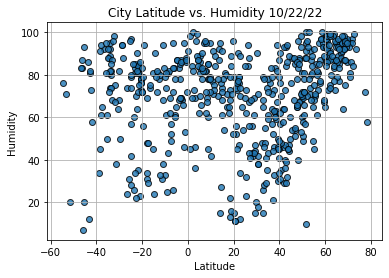

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

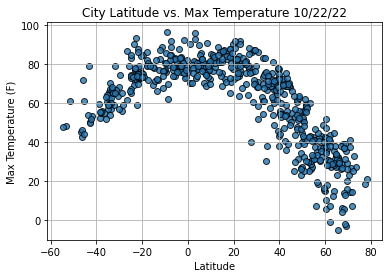

In [18]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

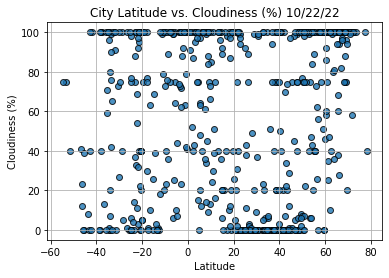

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

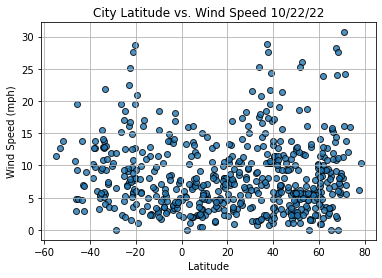

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [22]:
index13 = city_data_df.loc[13]
index13

City                    Busselton
Country                        AU
Date          2022-10-22 18:30:34
Lat                        -33.65
Lng                      115.3333
Max Temp                    56.68
Humidity                       80
Cloudiness                     76
Wind Speed                   5.53
Name: 13, dtype: object

In [23]:
city_data_df["Lat"] >= 0

0       True
1       True
2      False
3       True
4      False
       ...  
557     True
558     True
559    False
560     True
561     True
Name: Lat, Length: 562, dtype: bool

In [24]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Dingle,PH,2022-10-22 18:33:00,10.9995,122.6711,76.24,91,100,5.28
1,Bali Chak,IN,2022-10-22 18:33:01,22.3667,87.5500,73.69,76,100,7.65
3,Chapais,CA,2022-10-22 18:33:02,49.7834,-74.8492,55.18,60,77,10.02
7,Albany,US,2022-10-22 18:30:10,42.6001,-73.9662,68.72,40,0,5.91
8,Hilo,US,2022-10-22 18:33:06,19.7297,-155.0900,77.29,96,100,4.61
...,...,...,...,...,...,...,...,...,...
556,Sembakung,ID,2022-10-22 18:52:55,3.8167,117.2500,73.94,99,97,2.19
557,Cotonou,BJ,2022-10-22 18:48:26,6.3654,2.4183,82.38,83,40,8.05
558,New Bedford,US,2022-10-22 18:52:56,41.6362,-70.9342,69.01,58,0,10.00
560,Novyy Urengoy,RU,2022-10-22 18:48:33,66.0833,76.6333,29.37,92,100,11.86


In [25]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

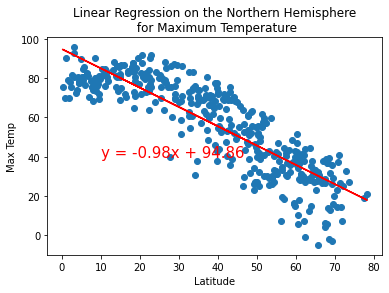

In [26]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Northern Hemisphere\n for Maximum Temperature', 'Max Temp',(10,40))

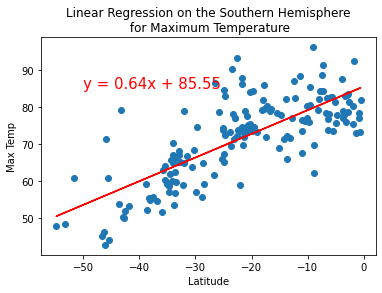

In [27]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,'Linear Regression on the Southern Hemisphere\n for Maximum Temperature', 'Max Temp',(-50,85))

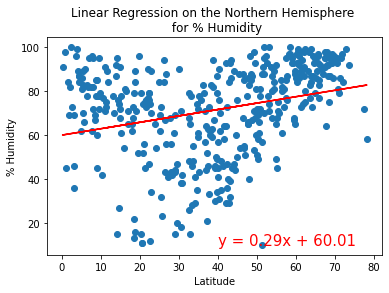

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(40,10))

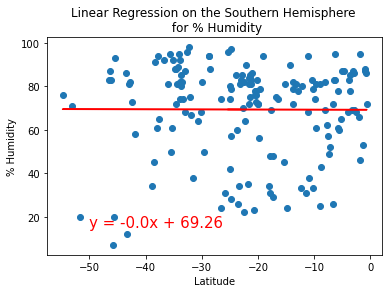

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

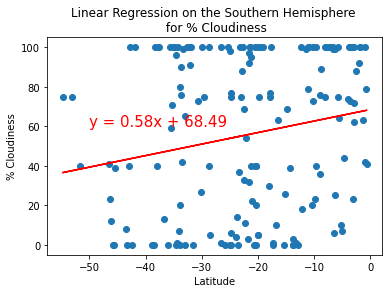

In [30]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

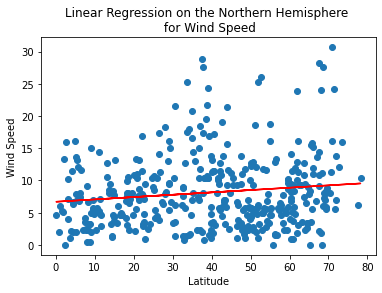

In [31]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

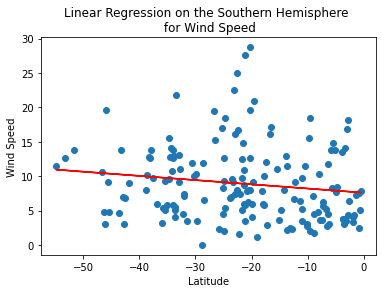

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))